In [1]:
import sys
sys.path.append("..")
import lovely_tensors as lt
from tqdm import tqdm
import os
import pandas as pd
from torchvision.transforms.functional import to_pil_image
lt.monkey_patch()

In [2]:
from grins.data.mit_place_pulse.dataset import MITPlacePulseDataset
from grins.config import EXTERNAL_DATA_DIR

2025-09-23 18:06:51.770 | INFO     | grins.config:<module>:11 - PROJ_ROOT path is: /home/nicola/Development/GRINS


In [9]:
from torchvision.transforms import ToTensor, Compose, PILToTensor
from grins.data.mit_place_pulse.preprocess import RemoveWatermark

transform = Compose([PILToTensor(), RemoveWatermark()])

In [10]:
ds = MITPlacePulseDataset("../data/external/mit-place-pulse", split="train", transform=transform)

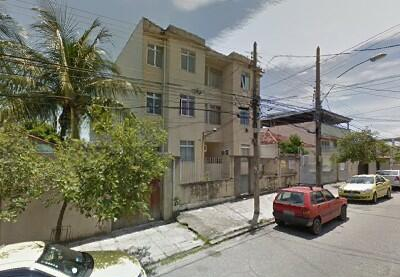

In [11]:
# show image0 as PIL
to_pil_image(ds[0]["image0"])

In [12]:
ds[0]["image0"]

tensor[3, 277, 400] u8 n=332400 (0.3Mb) x∈[0, 255] μ=123.909 σ=54.982

In [13]:
import torch
from transformers import AutoImageProcessor, AutoModel
from transformers.image_utils import load_image

pretrained_model_name = "facebook/dinov3-vitb16-pretrain-lvd1689m"
processor = AutoImageProcessor.from_pretrained(pretrained_model_name)
model = AutoModel.from_pretrained(
    pretrained_model_name, 
    device_map="auto", 
)

inputs = processor(images=ds[0]["image0"], return_tensors="pt").to(model.device)
print(inputs)
with torch.inference_mode():
    outputs = model(**inputs)

pooled_output = outputs.pooler_output
pooled_output, outputs.last_hidden_state[0, 0]

{'pixel_values': tensor[1, 3, 224, 224] n=150528 (0.6Mb) x∈[-2.009, 2.554] μ=0.164 σ=0.918 cuda:0}


(tensor[1, 768] 3Kb x∈[-1.792, 1.802] μ=-0.007 σ=0.559 cuda:0,
 tensor[768] 3Kb x∈[-1.792, 1.802] μ=-0.007 σ=0.559 cuda:0)